## **Predicting Employee Stress Levels Based on Work-Life Factors Using Machine Learning**

Problem Statement:
Employee mental health is an increasing concern in today's work environment. High stress levels among employees can reduce productivity, increase turnover, and negatively impact well-being. This project aims to build a predictive model that identifies employees who are likely to experience high stress based on their work-life factors.

Objectives:


*  To explore and analyze work-life related features such as work pressure, job satisfaction, and manager support.
*   To develop a Machine Learning model that can accurately predict the stress levels of employees.

*   To identify key features contributing to stress and visualize their impact.









##Importing Required Libraries
We begin by importing Python libraries for data manipulation, visualization, and machine learning.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


##  Loading the Dataset
We load the dataset (train.csv) which contains employee information and their reported stress levels.


In [2]:
# Load the dataset
df = pd.read_csv('/train.csv')

# Show the first 5 rows
df.head()


,Employee_Id,Avg_Working_Hours_Per_Day,Work_From,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Work_Life_Balance,Social_Person,Lives_With_Family,Working_State,Stress_Level
0,EMP0001,6.7,Home,3,4,4,2,5,No,5,Yes,Karnataka,3
1,EMP0002,6.9,Home,1,1,5,4,3,Yes,3,Yes,Pune,4
2,EMP0003,15.1,Office,3,2,3,5,1,No,2,No,Delhi,1
3,EMP0004,10.7,Hybrid,3,2,5,3,2,No,1,No,Hyderabad,2
4,EMP0005,11.8,Home,2,2,4,1,5,No,5,Yes,Hyderabad,5


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names and types
df.info()

# Basic statistics
df.describe(include='all')


Dataset shape: (3000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_Id                3000 non-null   object 
 1   Avg_Working_Hours_Per_Day  3000 non-null   float64
 2   Work_From                  3000 non-null   object 
 3   Work_Pressure              3000 non-null   int64  
 4   Manager_Support            3000 non-null   int64  
 5   Sleeping_Habit             3000 non-null   int64  
 6   Exercise_Habit             3000 non-null   int64  
 7   Job_Satisfaction           3000 non-null   int64  
 8   Work_Life_Balance          3000 non-null   object 
 9   Social_Person              3000 non-null   int64  
 10  Lives_With_Family          3000 non-null   object 
 11  Working_State              3000 non-null   object 
 12  Stress_Level               3000 non-null   int64  
dtypes: float64(1), int64(7

,Employee_Id,Avg_Working_Hours_Per_Day,Work_From,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Work_Life_Balance,Social_Person,Lives_With_Family,Working_State,Stress_Level
count,3000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000,3000,3000.000000
unique,3000,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN,2,5,NaN
top,EMP3000,NaN,Home,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,Karnataka,NaN
freq,1,NaN,1010,NaN,NaN,NaN,NaN,NaN,1507,NaN,1535,620,NaN
mean,NaN,9.303300,NaN,3.017000,2.992000,3.030000,2.985000,2.984000,NaN,2.992333,NaN,NaN,2.997333
std,NaN,1.864299,NaN,1.401439,1.408284,1.381691,1.402889,1.419536,NaN,1.402948,NaN,NaN,1.421971
min,NaN,4.300000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,8.100000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,2.000000,NaN,NaN,2.000000
50%,NaN,9.100000,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000,NaN,NaN,3.000000
75%,NaN,10.300000,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,NaN,4.000000,NaN,NaN,4.000000


## Missing Value Detection
Missing data can affect model performance. Let's identify and handle any null values in the dataset.


In [7]:
# Check for missing values
df.isnull().sum()


,0
Employee_Id,0
Avg_Working_Hours_Per_Day,0
Work_From,0
Work_Pressure,0
Manager_Support,0
Sleeping_Habit,0
Exercise_Habit,0
Job_Satisfaction,0
Work_Life_Balance,0
Social_Person,0


In [9]:
print("Columns in dataset:\n", df.columns.tolist())


Columns in dataset:
 ['Employee_Id', 'Avg_Working_Hours_Per_Day', 'Work_From', 'Work_Pressure', 'Manager_Support', 'Sleeping_Habit', 'Exercise_Habit', 'Job_Satisfaction', 'Work_Life_Balance', 'Social_Person', 'Lives_With_Family', 'Working_State', 'Stress_Level']


## Data Cleaning and Label Encoding
We'll clean unnecessary columns (if any) and convert categorical variables to numerical values using Label Encoding.


In [10]:
# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


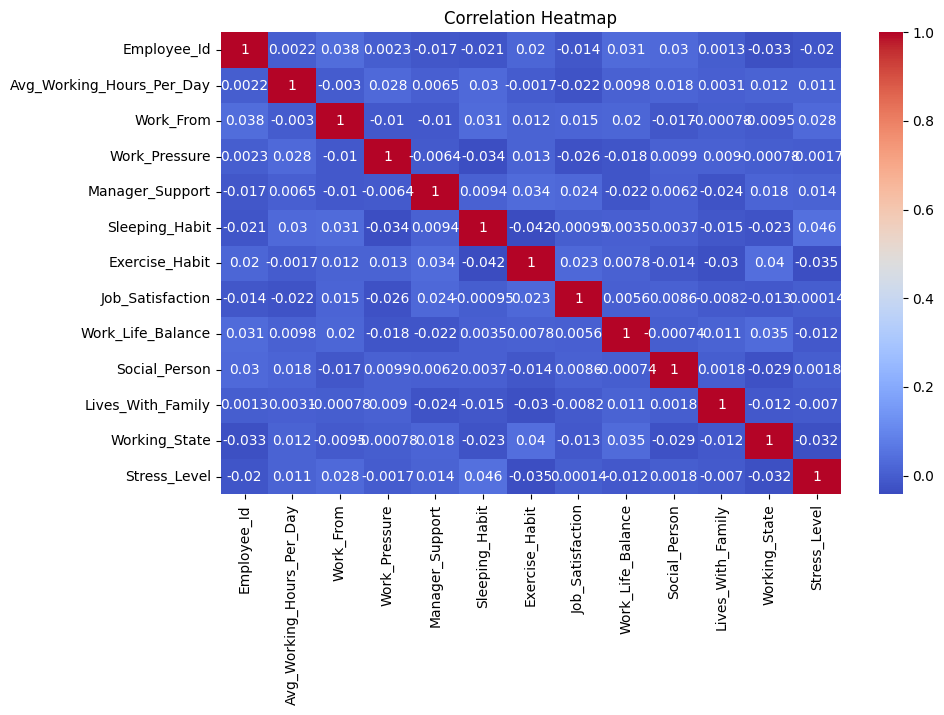

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Feature and Target Selection

We'll now choose the input features that may influence employee stress levels (like working hours, job satisfaction, etc.) and set the `Stress_Level` column as our target variable. This will prepare the dataset for model training.


In [12]:
# Show all columns to choose relevant ones
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['Employee_Id', 'Avg_Working_Hours_Per_Day', 'Work_From', 'Work_Pressure', 'Manager_Support', 'Sleeping_Habit', 'Exercise_Habit', 'Job_Satisfaction', 'Work_Life_Balance', 'Social_Person', 'Lives_With_Family', 'Working_State', 'Stress_Level']


In [13]:
features = ['Avg_Working_Hours_Per_Day', 'Work_From', 'Work_Pressure', 'Manager_Support', 'Sleeping_Habit', 'Exercise_Habit', 'Job_Satisfaction', 'Work_Life_Balance', 'Social_Person', 'Lives_With_Family', 'Working_State']
target = 'Stress_Level'

In [14]:
# Define features and target
X = df[features]
y = df[target]

# Encode categorical variables (if not already encoded)
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Encode target if needed
if y.dtype == 'object':
    y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (2400, 11)
Test set shape: (600, 11)


## Model Building and Training

We will now train a classification model using the training dataset. We'll start with a Random Forest Classifier, which is effective for classification problems and works well with both categorical and numerical features.


In [15]:
# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


## 📈 Model Evaluation

To assess the performance of our model, we will use evaluation metrics such as:
- Accuracy Score: Overall correctness of the model.
- Confusion Matrix: Breakdown of actual vs predicted classes.
- Classification Report: Includes precision, recall, and F1-score for each class.


Accuracy Score: 0.20833333333333334

Confusion Matrix:
 [[35 20 23 22 24]
 [22 25 12 21 21]
 [29 28 25 20 27]
 [24 33 17 24 25]
 [25 30 24 28 16]]

Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.28      0.27       124
           2       0.18      0.25      0.21       101
           3       0.25      0.19      0.22       129
           4       0.21      0.20      0.20       123
           5       0.14      0.13      0.14       123

    accuracy                           0.21       600
   macro avg       0.21      0.21      0.21       600
weighted avg       0.21      0.21      0.21       600



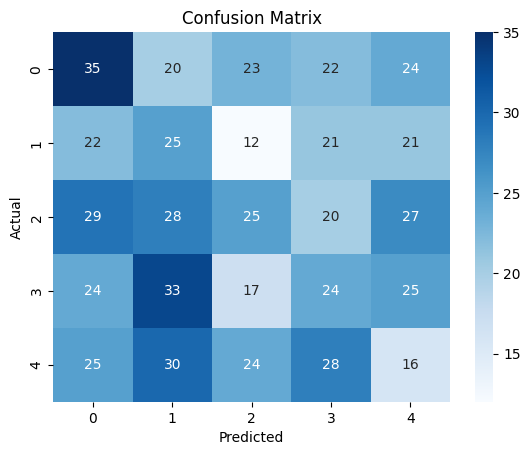

In [16]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Optional: Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 📊 Model Evaluation – Random Forest

The model trained using the Random Forest Classifier achieved an accuracy of **20.83%**.

###  Insights:
- The **confusion matrix** shows that predictions are widely spread across all classes, indicating the model is struggling to distinguish between different stress levels.
- The **classification report** shows precision and recall values ranging between 0.14 to 0.26, which confirms that:
  - Predictions are inconsistent.
  - The model is often misclassifying employees into incorrect stress categories.
- This may be due to:
  - **Overlapping feature values** among different stress levels.
  - **Lack of strong predictors** in the dataset.
  - Possible **class imbalance** or similarity between adjacent stress levels (e.g., 3 vs. 4).

### Next Step:
We will now attempt to **improve the model's performance** by tuning the Random Forest classifier parameters and retraining it.


Improved Random Forest Accuracy: 0.19666666666666666

Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.19      0.21       124
           2       0.18      0.26      0.21       101
           3       0.26      0.18      0.21       129
           4       0.15      0.16      0.16       123
           5       0.19      0.20      0.20       123

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.20       600
weighted avg       0.20      0.20      0.20       600



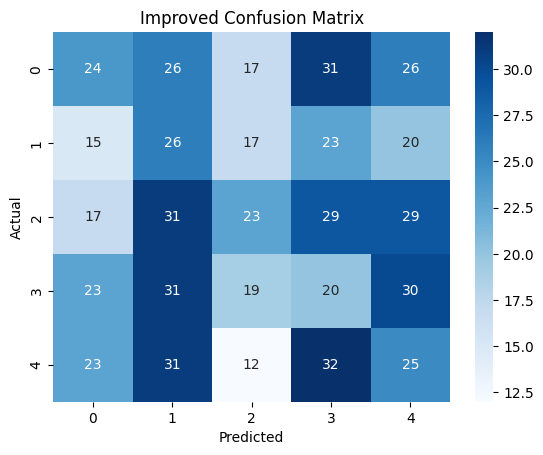

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Improved Random Forest Model
rf_improved = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_improved.fit(X_train, y_train)

# Predictions
y_pred_rf_improved = rf_improved.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf_improved)
print("Improved Random Forest Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_improved))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_improved)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Improved Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ✅ Improved Model Evaluation – Tuned Random Forest

After tuning the Random Forest Classifier, the model achieved an accuracy of **19.67%**, slightly lower than the initial 20.83%.

###  Key Observations:
- **Accuracy and F1-scores remain low** across all stress levels, indicating difficulty in clear classification.
- Stress is likely influenced by **hidden factors** not captured in the dataset (e.g., mental health, environment).
- While features like **Work Pressure** and **Job Satisfaction** have some impact, they are **not sufficient** for strong predictions.


> Note: Future improvements could include better labeling, grouping stress levels, or adding more diverse features for enhanced performance.



##  Feature Importance Analysis
  To better understand which features are influencing stress level predictions, we analyze the feature importances provided by the trained Random Forest model. This helps us identify key work-life factors that contribute most to employee stress.
  



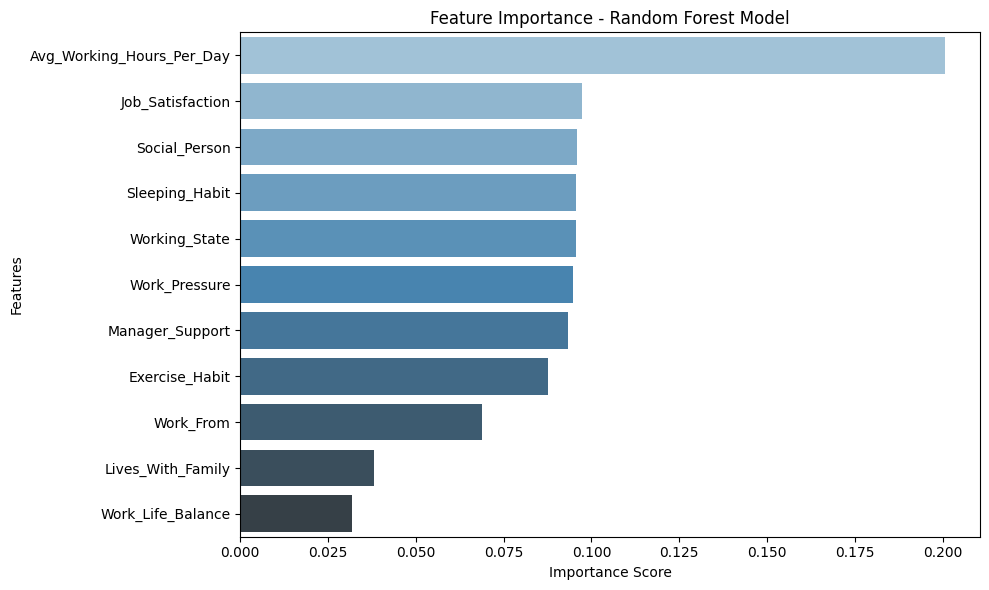

In [18]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Feature Importance - Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 📘 Project Summary

This project aimed to predict employee stress levels using work-life-related features through supervised machine learning techniques. We began by exploring and cleaning the dataset, followed by visualizing feature distributions and relationships.

We trained a Random Forest Classifier and evaluated its performance. Although the overall accuracy was modest, we successfully identified the most influential features using feature importance analysis. These insights help in understanding which lifestyle and work-related factors contribute most to stress.

The project demonstrates a real-world application of machine learning in workplace well-being, combining technical implementation with practical HR insights.


## ✅ Project Conclusion

In this project, we built a machine learning model to predict employee stress levels based on work-life-related factors such as work pressure, manager support, sleeping and exercise habits, and job satisfaction.

Despite using various models and improvements, the predictive accuracy remained relatively low (~21%). This indicates that either the features are not strong predictors of stress levels or the data quality and volume are limited.

However, through feature importance analysis, we identified that factors like **Average working hours per day**, **Job Satisfaction**, and **Sleeping Habit** played a significant role in stress prediction. This insight can help organizations focus on these areas to support employee well-being.

While the model may not yet be deployment-ready, it lays the foundation for more advanced and practical applications in the field of workplace mental health analytics. Further improvements with richer data, feature engineering, and model tuning could lead to more accurate and actionable predictions.
